# Import Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [2]:
df = pd.read_csv('extrovet_vs_introvet_personality_dataset.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


## Check The Data

In [3]:
df.shape

(2900, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2837.0,4.505816,3.479192,0.0,2.0,4.0,8.0,11.0
Social_event_attendance,2838.0,3.963354,2.903827,0.0,2.0,3.0,6.0,10.0
Going_outside,2834.0,3.000000,2.247327,0.0,1.0,3.0,5.0,7.0
Friends_circle_size,2823.0,6.268863,4.289693,0.0,3.0,5.0,10.0,15.0
Post_frequency,2835.0,3.564727,2.926582,0.0,1.0,3.0,6.0,10.0


In [6]:
df.sample

<bound method NDFrame.sample of       Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0                  4.0         No                      4.0            6.0   
1                  9.0        Yes                      0.0            0.0   
2                  9.0        Yes                      1.0            2.0   
3                  0.0         No                      6.0            7.0   
4                  3.0         No                      9.0            4.0   
...                ...        ...                      ...            ...   
2895               3.0         No                      7.0            6.0   
2896               3.0         No                      8.0            3.0   
2897               4.0        Yes                      1.0            1.0   
2898              11.0        Yes                      1.0            NaN   
2899               3.0         No                      6.0            6.0   

     Drained_after_socializing  Friends_cir

In [7]:
df.nunique()

Time_spent_Alone             12
Stage_fear                    2
Social_event_attendance      11
Going_outside                 8
Drained_after_socializing     2
Friends_circle_size          16
Post_frequency               11
Personality                   2
dtype: int64

## Exploratory Data Analysis

In [8]:
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [9]:
df.duplicated().sum()

388

In [10]:
df.fillna(0, inplace=True)
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,0.0,Yes,2.0,0.0,Introvert


In [11]:
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
cat_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

print(len(num_cols))
print(len(cat_cols))

5
3


## Visualization

In [12]:
colors = ['#DDEB9D', '#A0C878', '#626F47', '#A4B465', '#F5ECD5', '#DFD0B8', '#948979', '#F0BB78', '#E9A319', '#A86523']

### 1. Histogram Of Num_Cols

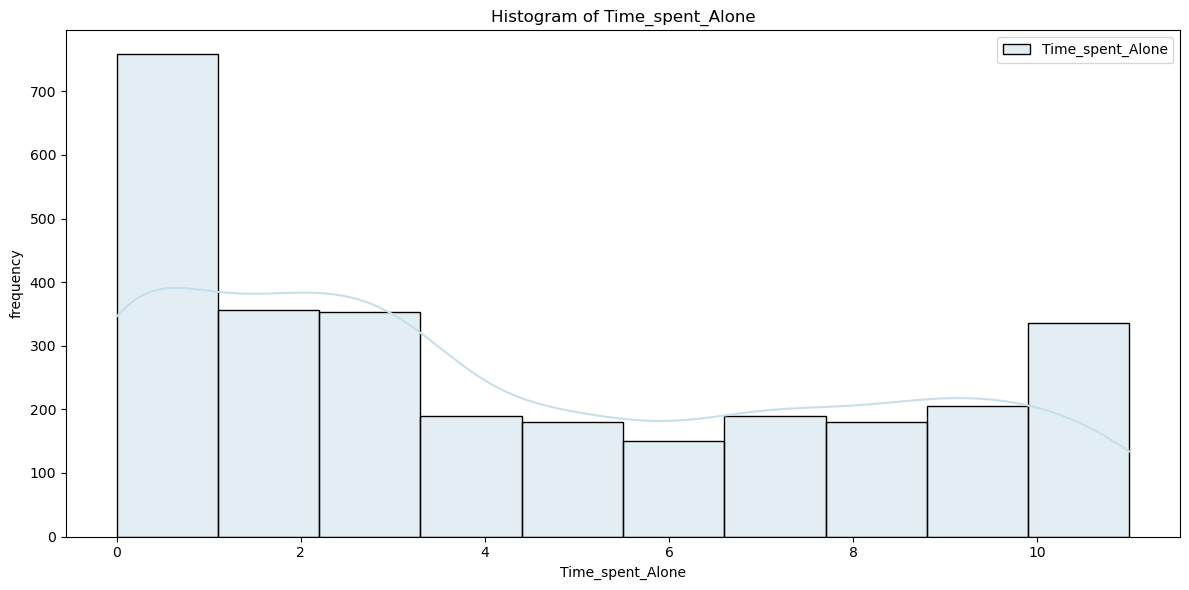

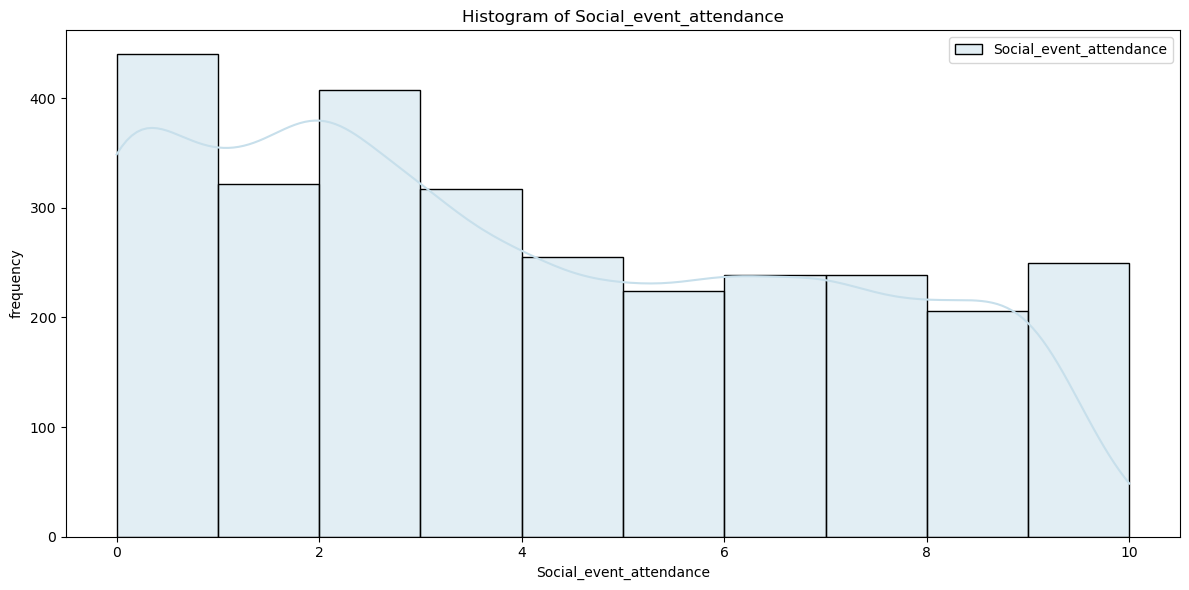

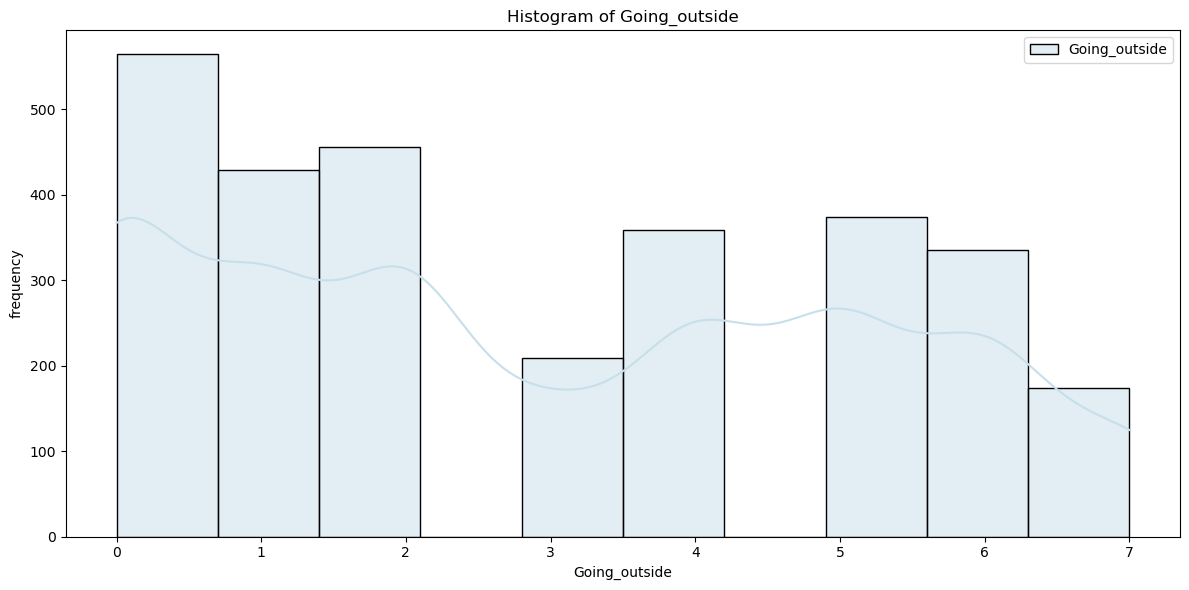

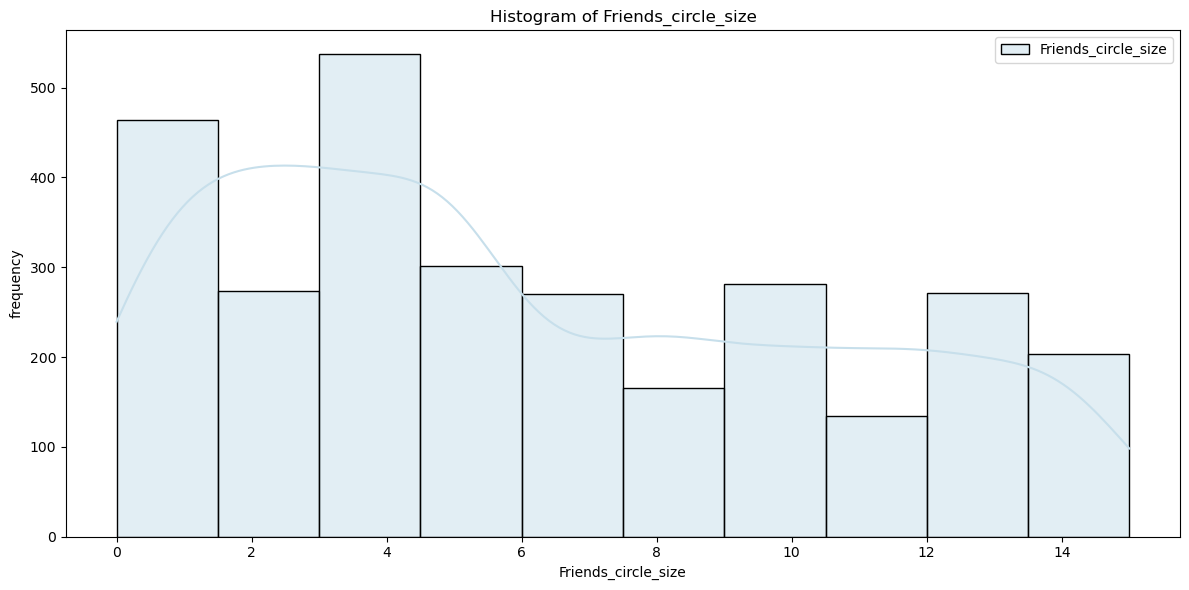

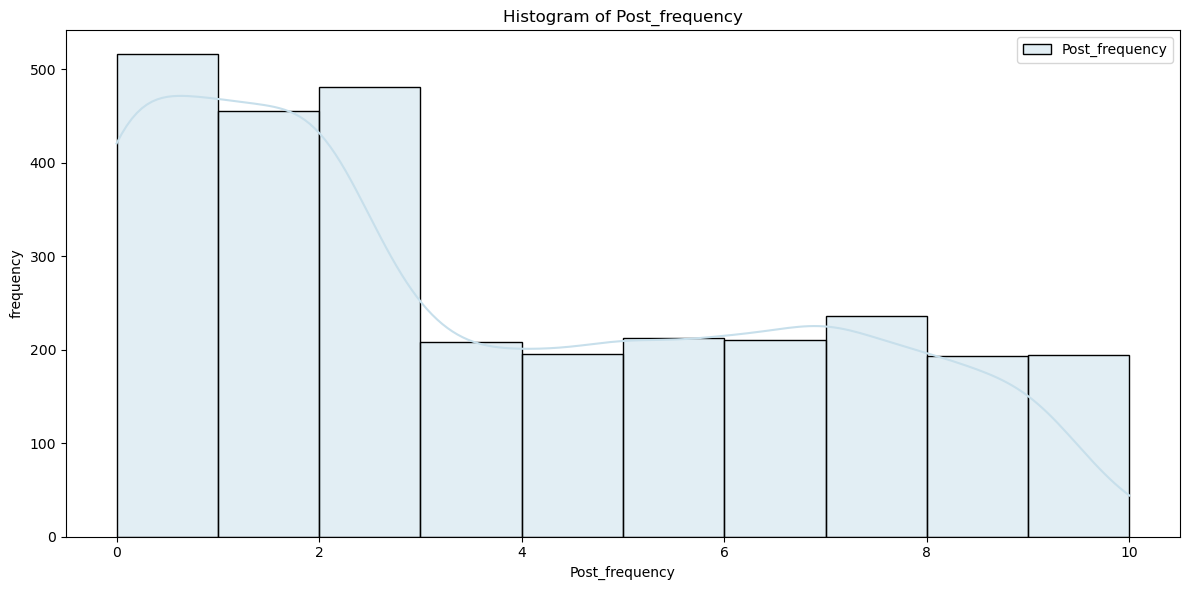

In [13]:
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[[col]], kde=True, palette='ch:s=.25,rot=-.25', bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()

### 2. Countplot Of Cat_Cols

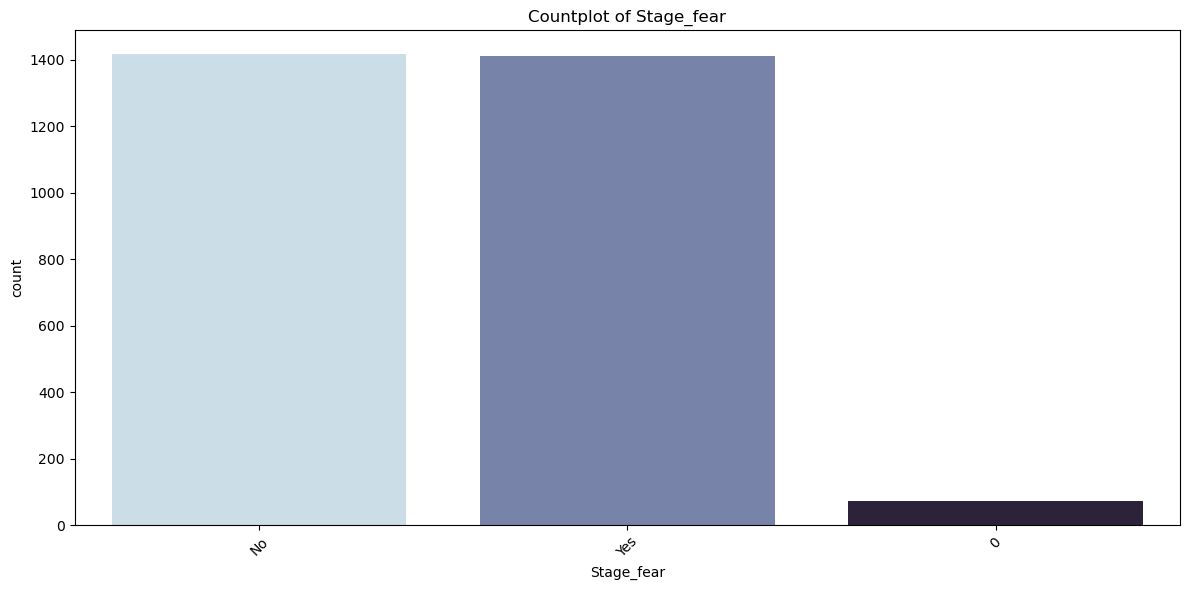

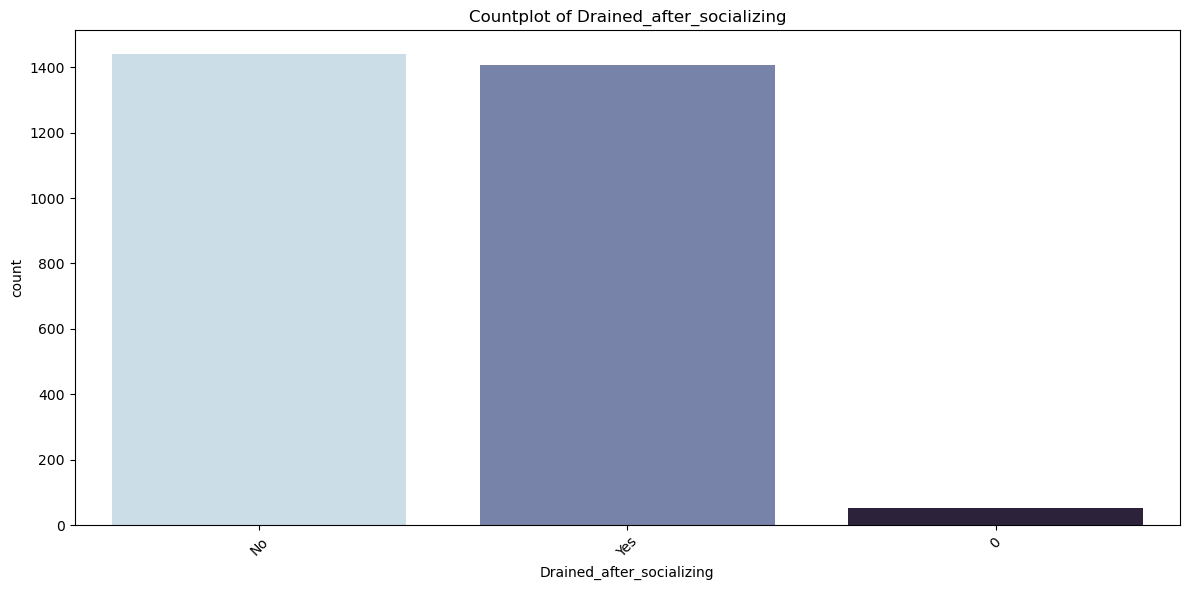

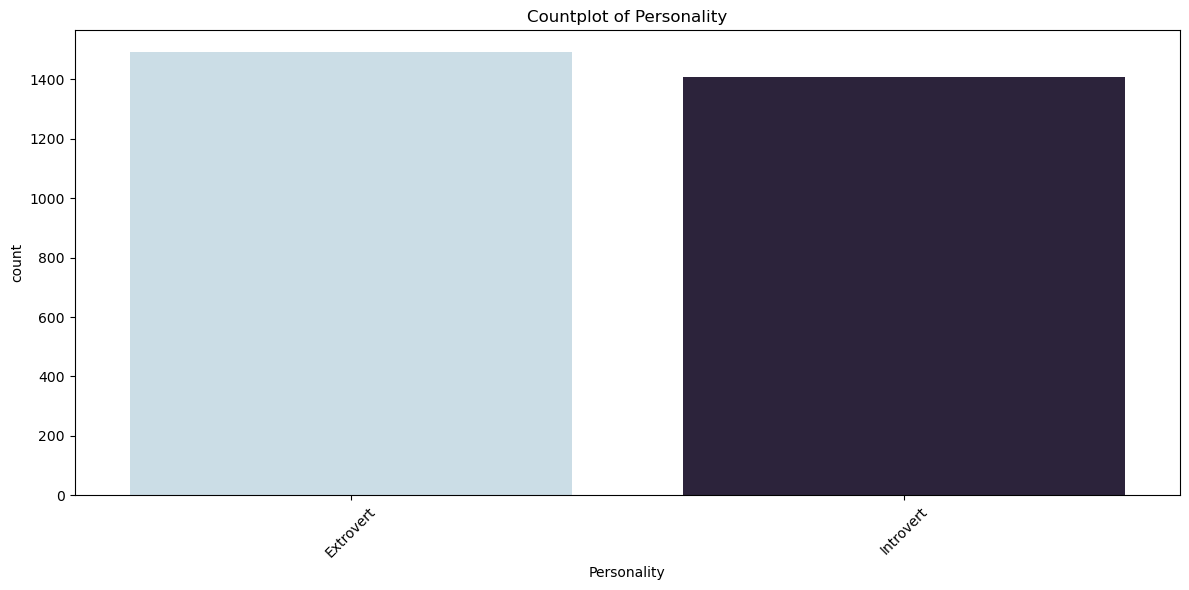

In [14]:
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, palette='ch:s=.25,rot=-.25')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3. Time Spent Alone vs Post Frequency

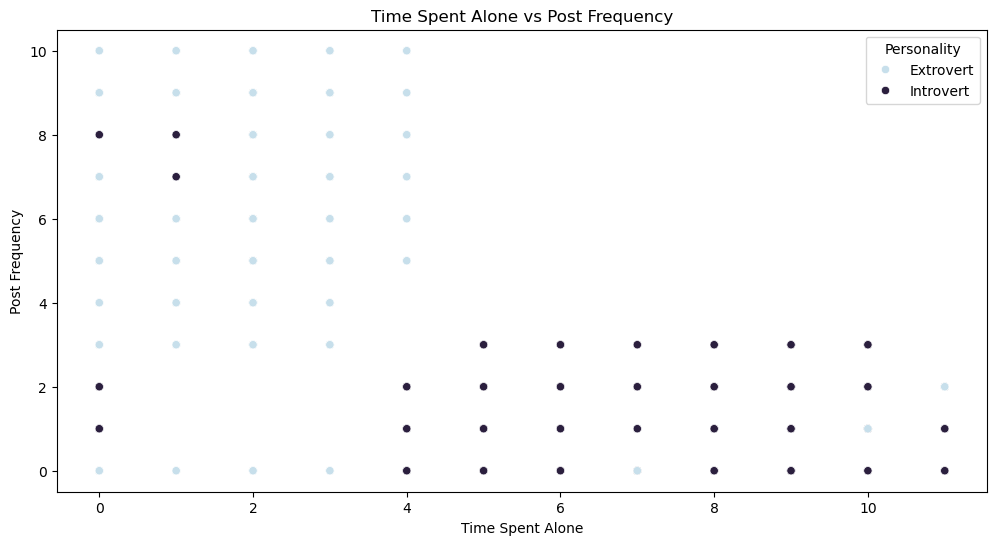

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Time_spent_Alone'], y=df['Post_frequency'], hue=df['Personality'], palette='ch:s=.25,rot=-.25')
plt.title('Time Spent Alone vs Post Frequency')
plt.xlabel('Time Spent Alone')
plt.ylabel('Post Frequency')
plt.show()

### 4. Time Spent Alone vs Going Outside

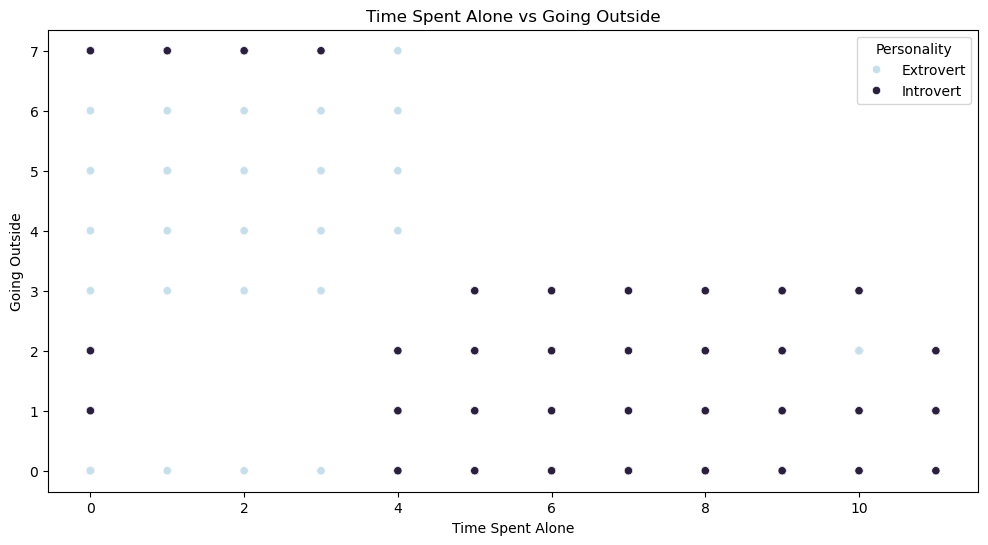

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Time_spent_Alone'], y=df['Going_outside'], hue=df['Personality'], palette='ch:s=.25,rot=-.25')
plt.title('Time Spent Alone vs Going Outside')
plt.xlabel('Time Spent Alone')
plt.ylabel('Going Outside')
plt.show()

### 5. Time Spent Alone vs Social Event Attendance

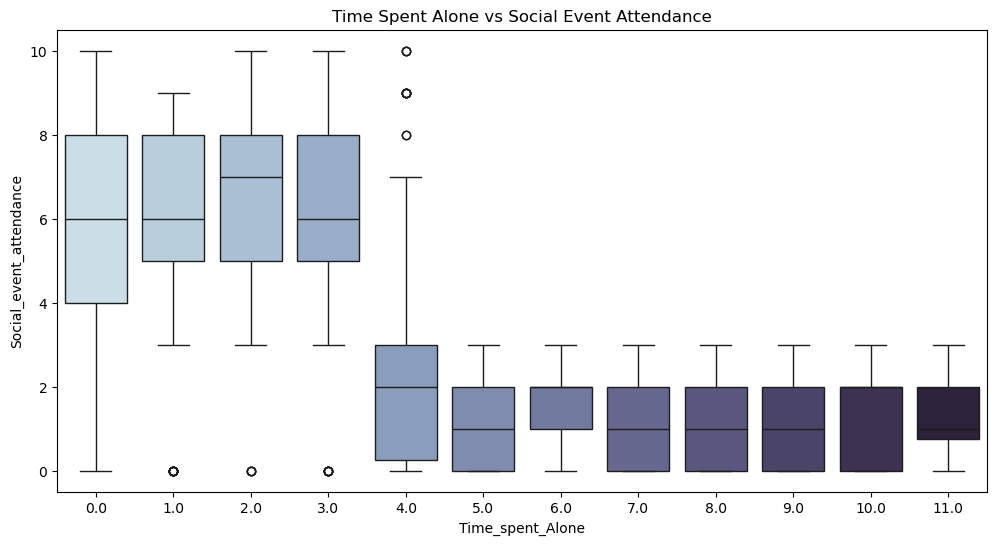

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Time_spent_Alone'], y=df['Social_event_attendance'], data=df, palette='ch:s=.25,rot=-.25')
plt.title('Time Spent Alone vs Social Event Attendance')
plt.xlabel('Time_spent_Alone')
plt.ylabel('Social_event_attendance')
plt.show()

### 6. Time Spent Alone vs Friends Circle Size

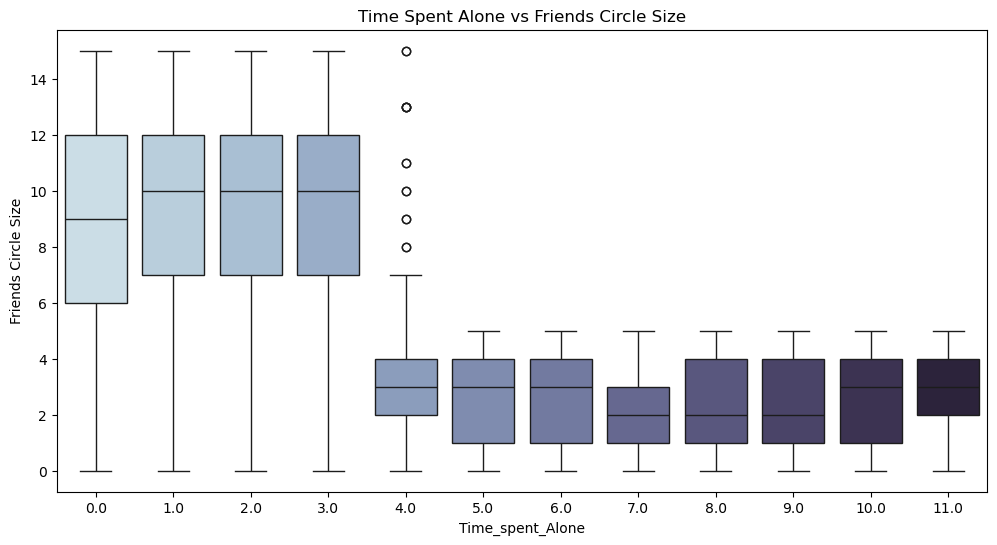

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Time_spent_Alone'], y=df['Friends_circle_size'], data=df, palette='ch:s=.25,rot=-.25')
plt.title('Time Spent Alone vs Friends Circle Size')
plt.xlabel('Time_spent_Alone')
plt.ylabel('Friends Circle Size')
plt.show()

### 7. Stage Fear According To Personality

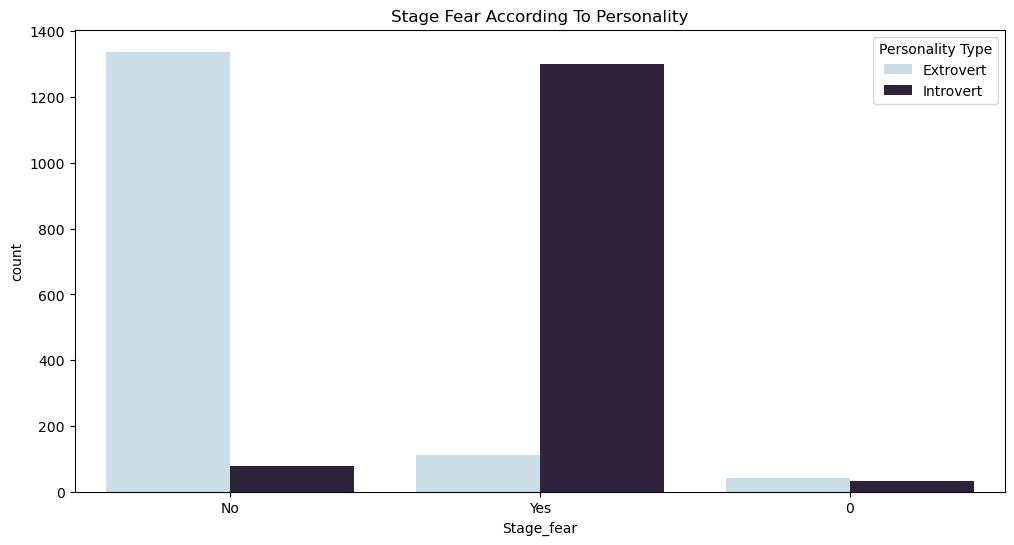

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Stage_fear'], hue=df['Personality'], palette='ch:s=.25,rot=-.25')
plt.title('Stage Fear According To Personality')
plt.xlabel('Stage_fear')
plt.ylabel('count')
plt.legend(title='Personality Type')
plt.show()

### 8. Going Outside & Friends Circle Size

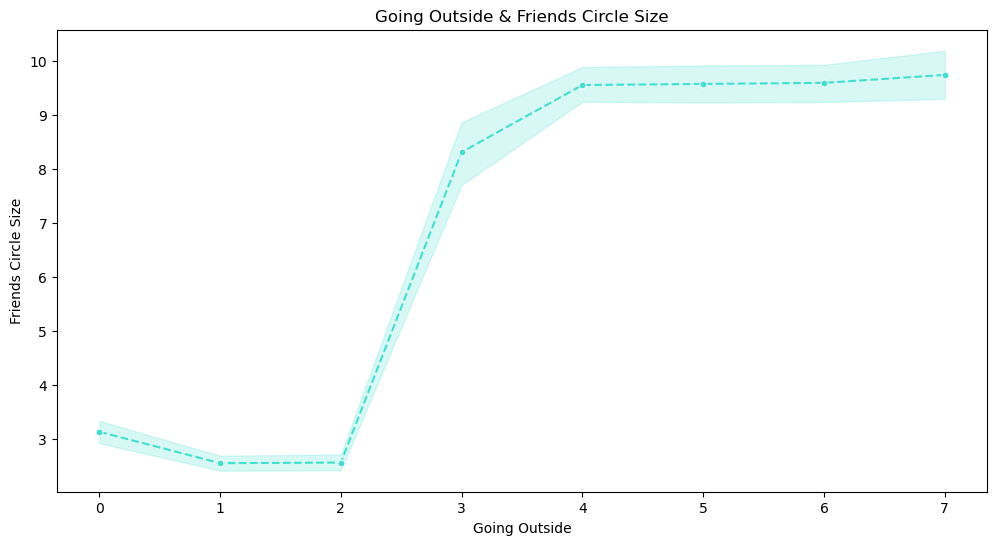

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Going_outside'], y=df['Friends_circle_size'], marker='o', linestyle='dashed', markersize=5, color='turquoise')
plt.title('Going Outside & Friends Circle Size')
plt.xlabel('Going Outside')
plt.ylabel('Friends Circle Size')
plt.show()

### 9. Social Event Attendance vs Going Outside

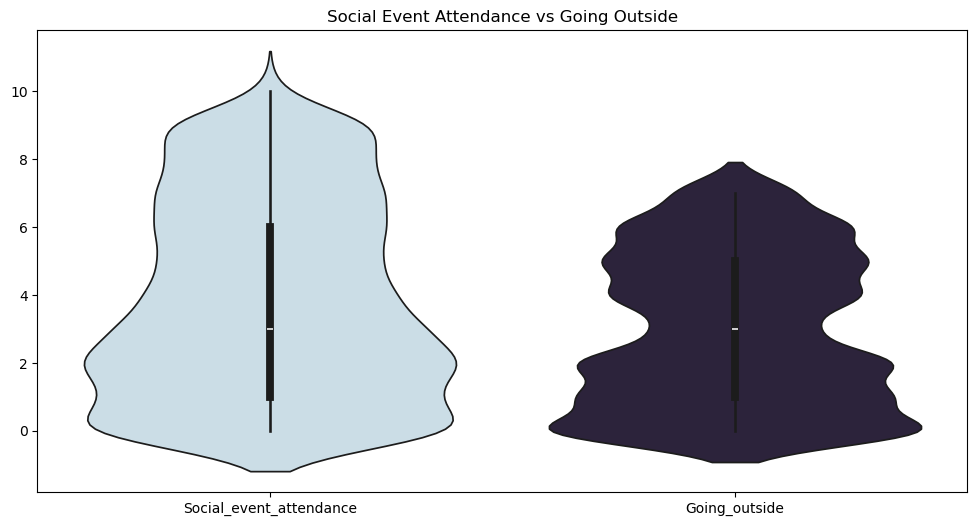

In [21]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['Social_event_attendance', 'Going_outside']], palette='ch:s=.25,rot=-.25')
plt.title('Social Event Attendance vs Going Outside')
plt.show()

In [22]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,0.0,Yes,2.0,0.0,Introvert


### 10. Correlation HeatMap

In [23]:
df['Stage_fear'].unique()

array(['No', 'Yes', 0], dtype=object)

In [24]:
df['Drained_after_socializing'].unique()

array(['No', 'Yes', 0], dtype=object)

In [25]:
df['Personality'].unique()

array(['Extrovert', 'Introvert'], dtype=object)

In [27]:
val = {'Stage_fear': {'No': 0, 'Yes': 1}, 
       'Drained_after_socializing': {'No': 0, 'Yes': 1},
      'Personality': {'Extrovert': 0, 'Introvert': 1}}
df.replace(val, inplace=True)
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0
...,...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0,0
2896,3.0,0,8.0,3.0,0,14.0,9.0,0
2897,4.0,1,1.0,1.0,1,4.0,0.0,1
2898,11.0,1,1.0,0.0,1,2.0,0.0,1


In [28]:
correlation = df.corr()

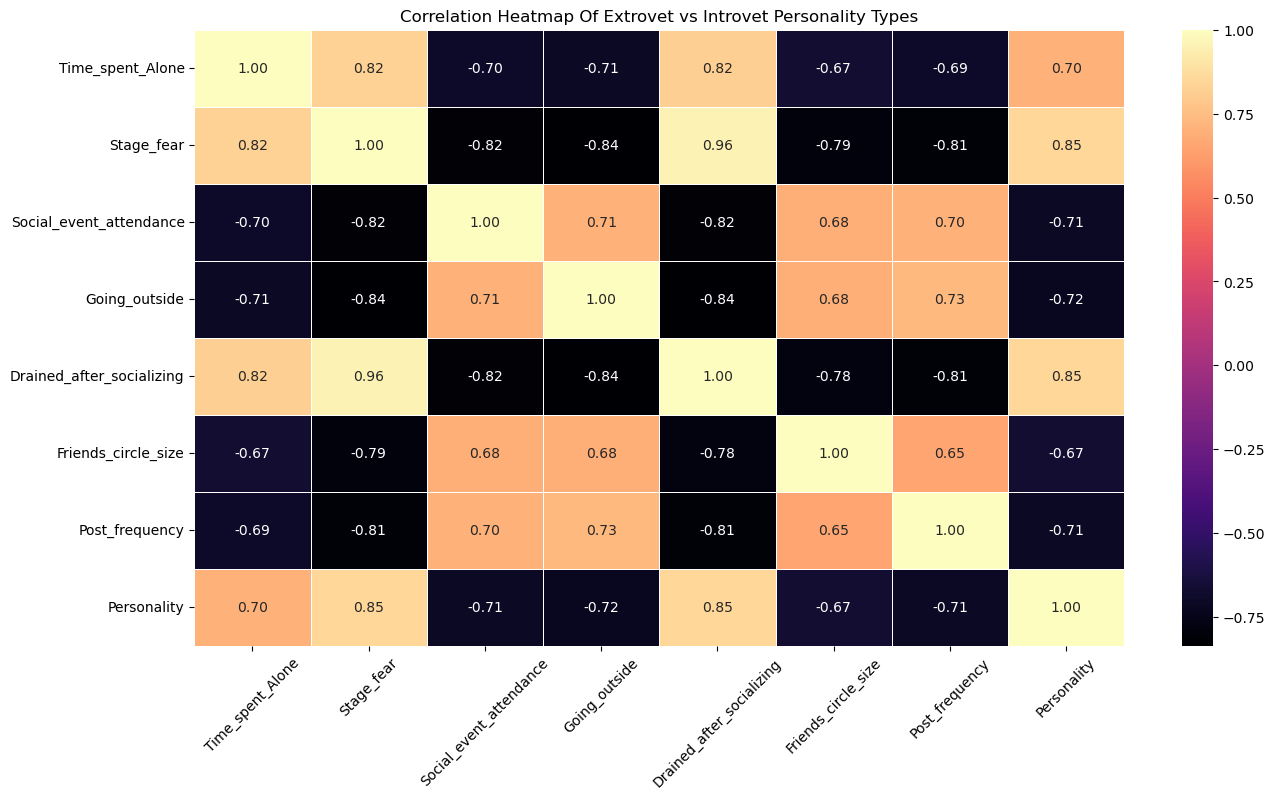

In [29]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Extrovet vs Introvet Personality Types')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

### 1. Train Test Split

In [30]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0
...,...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0,0
2896,3.0,0,8.0,3.0,0,14.0,9.0,0
2897,4.0,1,1.0,1.0,1,4.0,0.0,1
2898,11.0,1,1.0,0.0,1,2.0,0.0,1


In [31]:
features = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
target = 'Personality'

X = df[features]
y = df[target]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(2320, 7) (580, 7)


### 2. Models

In [35]:
models = {
     'Random Forest Classifier': RandomForestClassifier(),
     'Logistic Regression': LogisticRegression(),
     'Linear Regression': LinearRegression(),
     'CatBoost': CatBoostRegressor(),
     'Random Forest': RandomForestRegressor(),
     'Decision Tree Classifier': DecisionTreeClassifier(),
     'Hist Gradient Boosting Classifier': HistGradientBoostingClassifier()
}

#### 2.1 Train and Evaluate Models

In [36]:
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'MAE': mae}
    print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Random Forest Classifier - RMSE: 0.2816, MAE: 0.0793
Logistic Regression - RMSE: 0.2723, MAE: 0.0741
Linear Regression - RMSE: 0.2638, MAE: 0.1347
Learning rate set to 0.046766
0:	learn: 0.4823861	total: 168ms	remaining: 2m 47s
1:	learn: 0.4658756	total: 170ms	remaining: 1m 24s
2:	learn: 0.4504992	total: 171ms	remaining: 57s
3:	learn: 0.4361909	total: 173ms	remaining: 43.1s
4:	learn: 0.4224431	total: 176ms	remaining: 35s
5:	learn: 0.4096365	total: 178ms	remaining: 29.5s
6:	learn: 0.3975151	total: 181ms	remaining: 25.6s
7:	learn: 0.3862973	total: 183ms	remaining: 22.7s
8:	learn: 0.3756357	total: 185ms	remaining: 20.3s
9:	learn: 0.3656985	total: 186ms	remaining: 18.4s
10:	learn: 0.3563768	total: 188ms	remaining: 16.9s
11:	learn: 0.3477542	total: 193ms	remaining: 15.9s
12:	learn: 0.3398164	total: 195ms	remaining: 14.8s
13:	learn: 0.3322642	total: 196ms	remaining: 13.8s
14:	learn: 0.3252410	total: 209ms	remaining: 13.7s
15:	learn: 0.3187486	total: 210ms	remaining: 12.9s
16:	learn: 0.312749

### 2.2 Visualize Model Performance

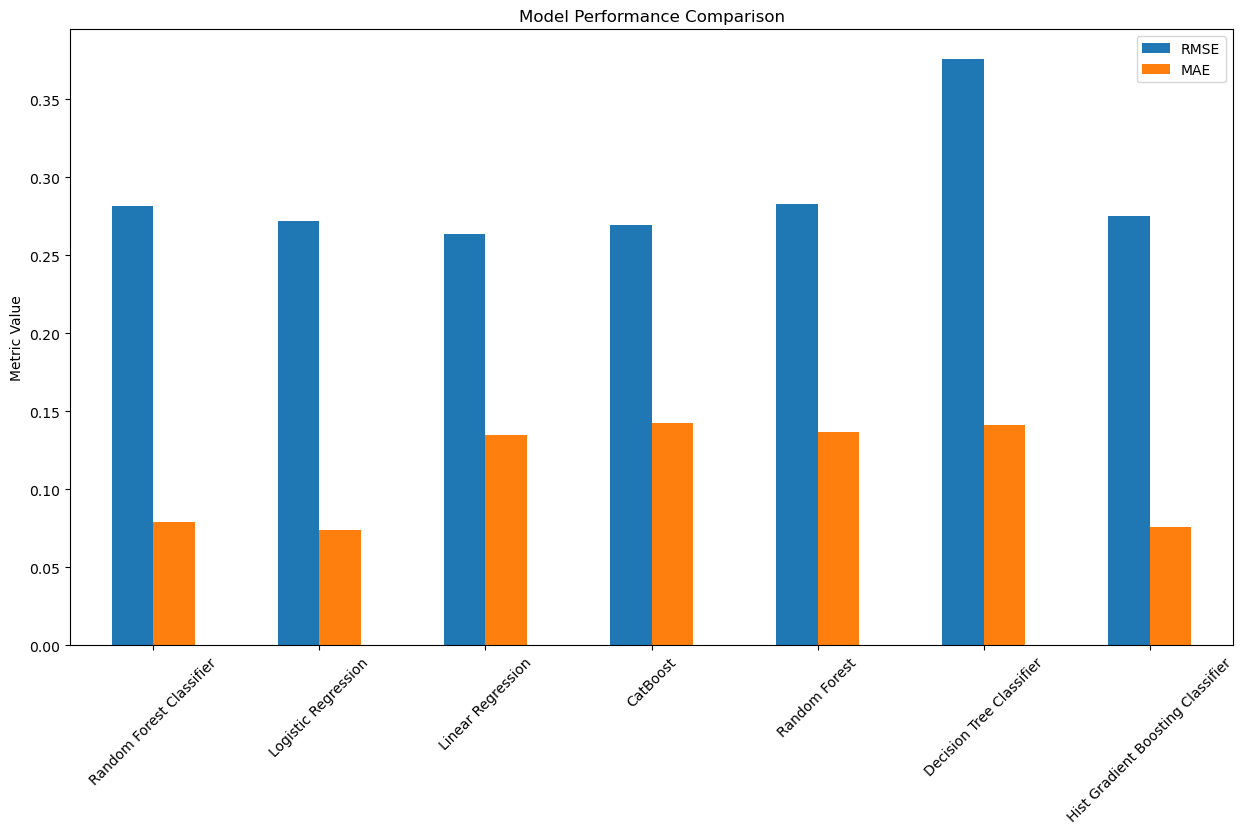

In [37]:
plt.figure(figsize=(15, 8))
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.show()